# sktime - A Unified Framework for Machine Learning with Time Series

Tutorial at the PyData Global 2021

Find out more at: https://github.com/alan-turing-institute/sktime

---
## Prelude: Cross-sectional regression with scikit-learn

Check out scikit-learn's [getting started guide](https://scikit-learn.org/stable/getting_started.html)!

### Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

X = diabetes["data"]
y = diabetes["target"]

print(X.shape, y.shape)

(442, 10) (442,)


In [3]:
pd.DataFrame(X, columns=diabetes["feature_names"]).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


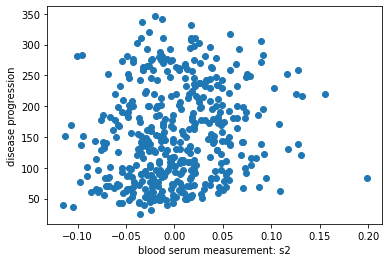

In [4]:
fig, ax = plt.subplots(1)
col = 5
ax.scatter(X[:, col], y)
ax.set(
    xlabel=f"blood serum measurement: {diabetes['feature_names'][col]}",
    ylabel="disease progression",
);

### Workflow

1. Model specification
2. Fitting
3. Prediction
4. Evaluation

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 10) (111, 10) (331,) (111,)


In [7]:
classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
mean_squared_error(y_test, y_pred)

3340.7953855855862

### Modular model building
* Pipelining & transformers
* Tuning
* Ensembling

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [12]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred)

3482.871351351351

### Summary

* cross-sectional input data, without any assumed temporal dependency or ordering
* three learning tasks: cross-sectional classification, regression and clustering 
* a common estimator API for each learning task 
* estimator APIs mirror learning tasks

---
## 1––Introduction to Machine Learning with Time Series


Check out our previous tutorial from the PyData Amsterdam 2020: https://github.com/sktime/sktime-tutorial-pydata-amsterdam-2020

### Multiple data formats

In [13]:
from sktime.datasets import load_lynx
from sktime.utils.plotting import plot_series

#### Univariate data
> Repeated observations over time from a single variable or kind of measurement

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of Lynx trappings'>)

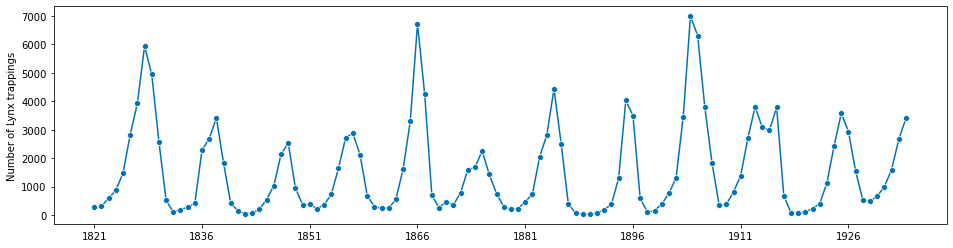

In [14]:
y = load_lynx()
plot_series(y)

#### Multivariate data
> Repeated observations over time from multiple related variables or kinds of measurement

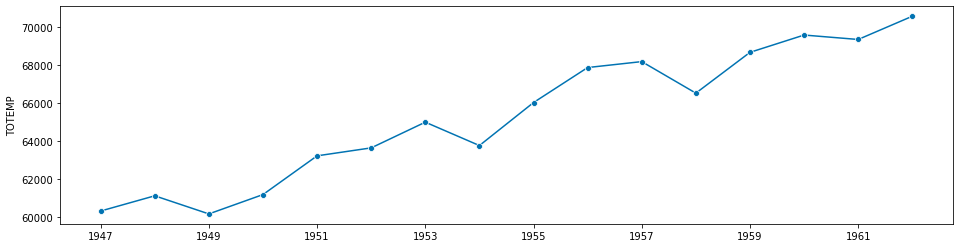

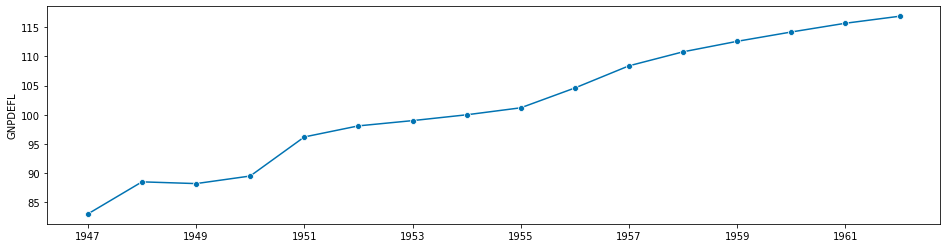

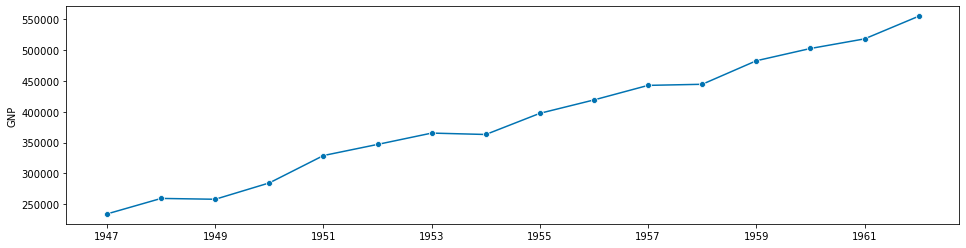

In [15]:
from sktime.datasets import load_longley

y, X = load_longley()

plot_series(y)
for column in X.columns[:2]:
    x = X[column]
    plot_series(x)

#### Panel data
> Repeated observations over time on multiple independent experimental units from one or more related variables or kinds of measurement

In [16]:
import matplotlib.pyplot as plt
from sktime.datasets import load_arrow_head
from sktime.datatypes import convert

In [17]:
X, y = load_arrow_head(return_X_y=True)
X = convert(X, from_type="nested_univ", to_type="numpy3D")

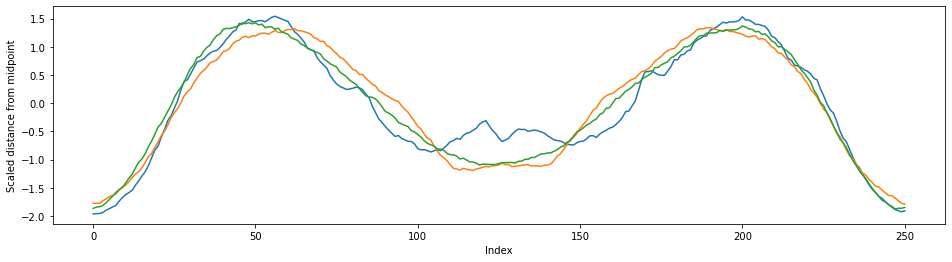

In [18]:
labels, counts = np.unique(y, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    ax.plot(X[y == label, 0, :][0], label=f"class {label}")
ax.set(ylabel="Scaled distance from midpoint", xlabel="Index");

### Multiple learning tasks

For example:
* Forecasting (different variations)
* Time Series Classification
* Time Series Annotation (e.g. outlier detection)
* Time Series Clustering

### Reduction: From one learning task to another

**Overview**

<img src="../images/reduction-relations.png"/>

**Example: From forecasting to regression** 

<img src="../images/forecasting-to-regression-reduction.png"/>

### Creating a unified framework

* time-series input data
* multiple learning tasks: forecasting, time series classification and more 
* a common estimator API for each learning task
* estimator APIs mirror learning tasks

![](https://i.imgur.com/JGcclfB.png)

**What's a framework?**

Check out our [glossary of common terms](https://www.sktime.org/en/stable/glossary.html):

> A collection of related and reusable software design templates that practitioners can copy and fill in. Frameworks emphasize design reuse. They capture common software design decisions within a given application domain and distill them into reusable design templates. This reduces the design decision they must take, allowing them to focus on application specifics. Not only can practitioners write software faster as a result, but applications will have a similar structure. Frameworks often offer additional functionality like toolboxes. Compare with toolbox and application.

Check out our [extension templates](https://github.com/alan-turing-institute/sktime/tree/main/extension_templates)!

![](https://i.imgur.com/HKSstog.png)

